In [ ]:
from utils import combine_sample_attributes_in_dataframe, get_data_and_remove_unwanted_columns, sanitize_data, count_no_of_modifications
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
df

Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore', '#modifications'],
      dtype='object')


,Protein Group,Protein Accession,Peptide,-10lgP,Mass,Length,ppm,z,RT,Area Sample 1,...,#Feature,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,#modifications
0,3,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMF...,76.82,6358.2485,56,-1.7,5,81.69,566790000.0,...,20,6,5,3,6,129,184,NaN,NaN,0
1,3,P02666,R.DMPIQAFLLYQEPVLGPVRGPFPIIV,75.16,2908.5923,26,-2.9,2,87.68,40392000.0,...,12,3,4,2,3,199,224,NaN,NaN,0
2,3,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,70.64,2924.5874,26,-3.3,2,86.69,2497000.0,...,8,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,1
3,3,P02666,S.QSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLS...,70.17,5308.7778,47,-1.4,4,84.10,9680600.0,...,5,2,1,1,1,138,184,NaN,NaN,0
4,3,P02666,K.YPVEPFTESQSLTLTDVENLHLPLP.L,69.89,2838.4326,25,-2.1,2,82.16,7855400.0,...,12,4,2,2,4,129,153,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,A5D9E6,E.TSK(-18.01)GDQLSK.S,25.37,944.4927,9,-9.2,2,14.02,NaN,...,1,0,0,0,1,151,159,lal,K3:lal:0.00,1
5373,87,A7E3W7,M.QAS(-18.01)LDLGTD.K,25.25,900.4189,9,4.5,1,46.67,NaN,...,1,0,0,1,0,162,170,lal,S3:lal:1000.00,1
5374,86,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,25.05,510.2550,7,-5.1,1,9.41,32259.0,...,1,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,1
5375,91,A5D9D1,G.S(-18.01)GIYAPHSP.K,24.64,909.4344,9,10.1,1,31.32,231050.0,...,1,1,0,0,0,224,232,lal,S1:lal:15.21,1


In [2]:
df_mod_types = df = df[df['PTM'].notna()] #get rows with modifications
df_mod_type_combination_count = df_mod_types.groupby(['PTM'])['PTM'].count() # get count of each modification combination
# sort df_mod_type_combination_count by count
df_mod_type_combination_count = df_mod_type_combination_count.sort_values(ascending=False)
df_mod_type_combination_count


PTM
Deamidation (NQ)                                                 828
Carbamidomethylation                                             352
Phosphorylation (STY)                                            338
Lactosylation                                                    161
lal                                                              111
                                                                ... 
Glycosylation type a; Phosphorylation (STY); Lactosylation         1
Glycosylation type a; Lactosylation; Phosphorylation (STY)         1
Glycosylation type a; Lactosylation; Dioxidation (M)               1
Glycosylation type a; Glycosylation type e                         1
Carbamidomethylation; Glycosylation type c/d; Dioxidation (M)      1
Name: PTM, Length: 361, dtype: int64

In [3]:
#create new row for each ";" in the PTM column
df_mod_types_new = df_mod_types.copy()
df_mod_types_new['PTM'] = df_mod_types_new['PTM'].str.split(';').str[0]
df_mod_type_count = df_mod_types_new.groupby(['PTM'])['PTM'].count()
# sort df_mod_type_count by count
df_mod_type_count = df_mod_type_count.sort_values(ascending=False)
df_mod_type_count


PTM
Deamidation (NQ)          1308
Phosphorylation (STY)      667
Carbamidomethylation       506
Lactosylation              371
lal                        319
Oxidation (M)              212
Pyro-glu from Q            138
Glycosylation type a       112
lan                         55
Glycosylation type b        53
Dioxidation (M)             48
Glycosylation type e        32
Glycosylation type c/d      25
Name: PTM, dtype: int64

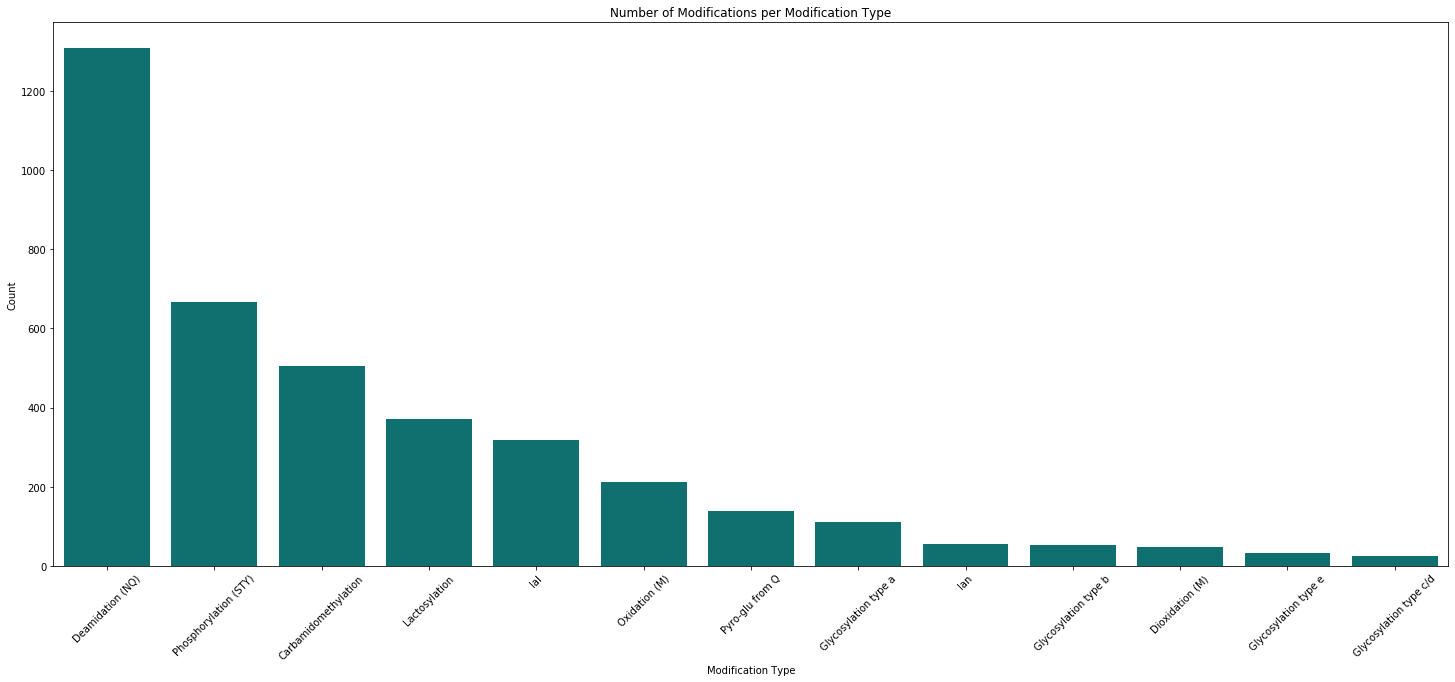

In [4]:
#plot df_mod_type_count
plt.figure(figsize=(25,10))
sns.barplot(x=df_mod_type_count.index, y=df_mod_type_count.values, color='#008080')
plt.xlabel('Modification Type')
plt.xticks(rotation=45)
plt.ylabel('Count') 
plt.title('Number of Modifications per Modification Type')
plt.show()

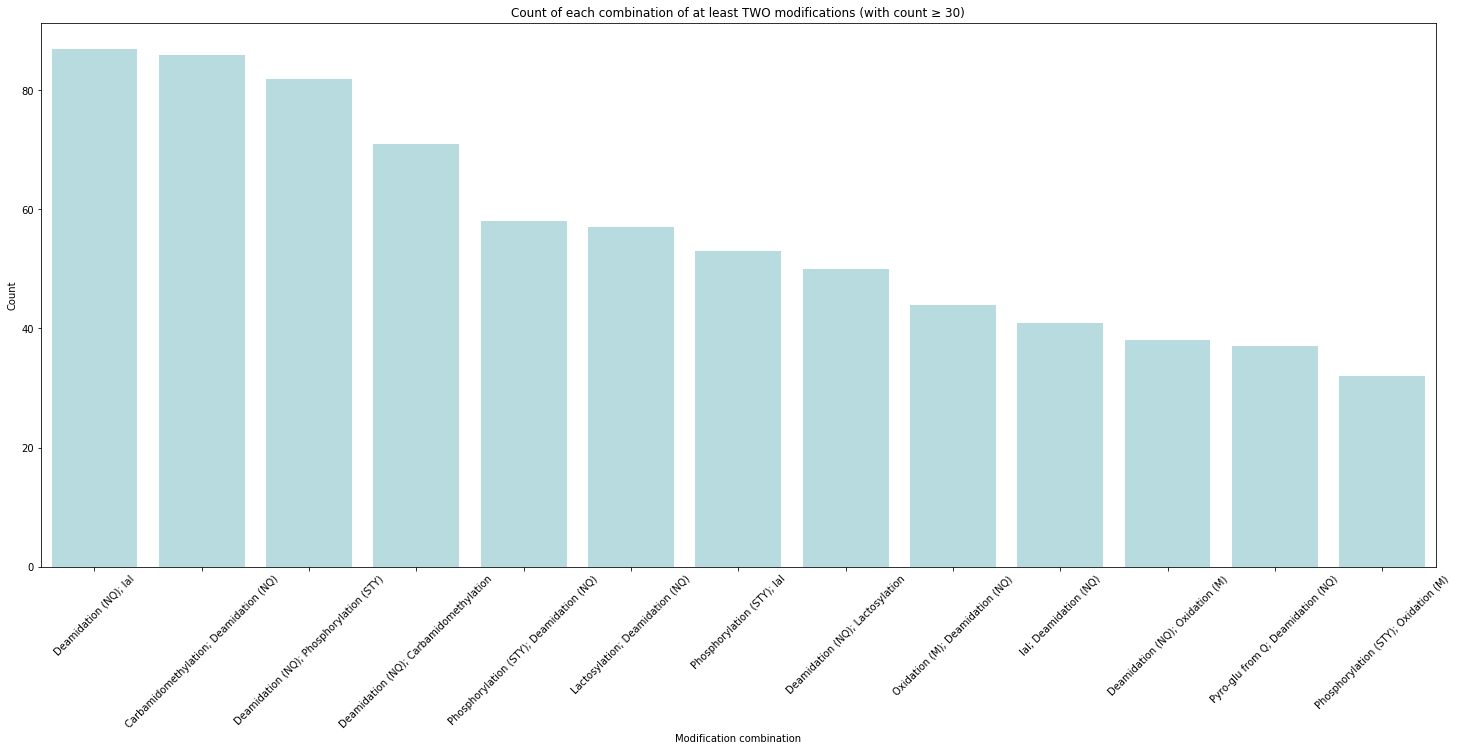

In [5]:
# filter rows that do not contain at least 2 modifications by looking for ";"
df_mod_type_combinations_gt_or_eq2 = df_mod_types[df_mod_types['PTM'].str.contains(';')]
df_mod_type_combinations_gt_or_eq2_count = df_mod_type_combinations_gt_or_eq2.groupby(['PTM'])['PTM'].count()

#only include counts grater than 5
min_count = 30
df_mod_type_combinations_gt_or_eq2_count = df_mod_type_combinations_gt_or_eq2_count[df_mod_type_combinations_gt_or_eq2_count >= min_count]
df_mod_type_combinations_gt_or_eq2_count = df_mod_type_combinations_gt_or_eq2_count.sort_values(ascending=False)

# plot the count of each modification combination
plt.figure(figsize=(25,10))
sns.barplot(x=df_mod_type_combinations_gt_or_eq2_count.index, y=df_mod_type_combinations_gt_or_eq2_count.values, color = '#B0E0E6')
plt.title(f'Count of each combination of at least TWO modifications (with count ≥ {min_count})')
plt.xlabel('Modification combination')
plt.xticks(rotation=45)
plt.ylabel('Count') 
plt.show()


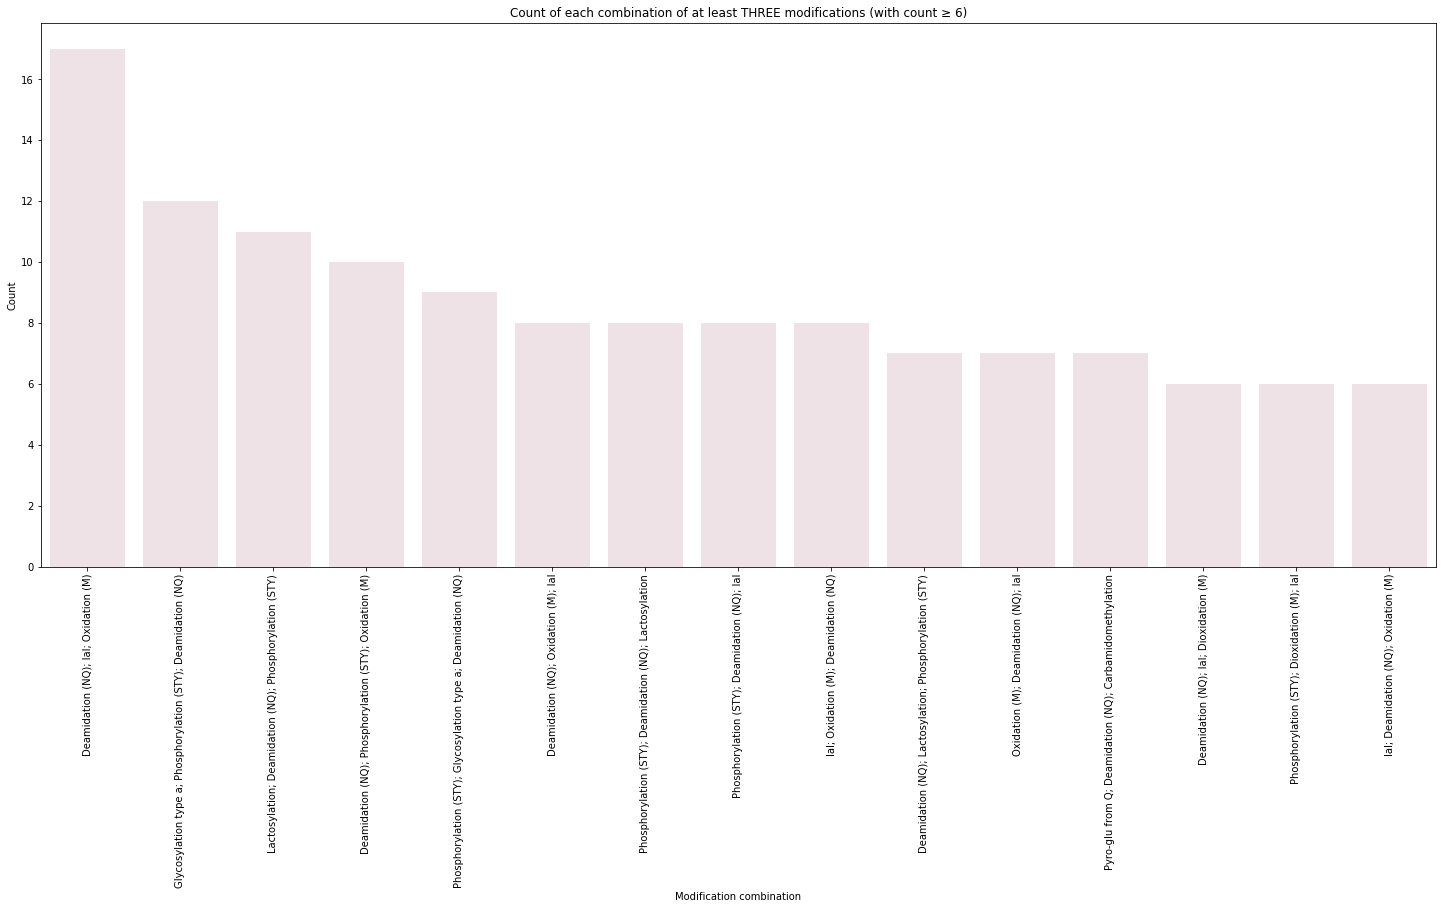

In [6]:
#check if string contains a substring more than once
def check_if_string_contains_substring_more_than_once(string, substring):
    if string.count(substring) > 1:
        return True
    else:
        return False

# filter rows that do not contain at least 3 modifications by looking for ";"
df_mod_type_combinations_gt_or_eq3 = df_mod_type_combinations_gt_or_eq2[df_mod_type_combinations_gt_or_eq2['PTM'].apply(check_if_string_contains_substring_more_than_once, args =(';') )]
df_mod_type_combinations_gt_or_eq3_count = df_mod_type_combinations_gt_or_eq3.groupby(['PTM'])['PTM'].count()
#only include counts grater than 5
min_count = 6
df_mod_type_combinations_gt_or_eq3_count = df_mod_type_combinations_gt_or_eq3_count[df_mod_type_combinations_gt_or_eq3_count >= 6]
df_mod_type_combinations_gt_or_eq3_count = df_mod_type_combinations_gt_or_eq3_count.sort_values(ascending=False)


# plot the count of each modification combination
plt.figure(figsize=(25,10))
sns.barplot(x=df_mod_type_combinations_gt_or_eq3_count.index, y=df_mod_type_combinations_gt_or_eq3_count.values, color = '#F0E0E6')
plt.title(f'Count of each combination of at least THREE modifications (with count ≥ {min_count})')
plt.xlabel('Modification combination')
plt.xticks(rotation=90)
plt.ylabel('Count') 
plt.show()


In [7]:
# number of modifications per modification combination compared to sample number 
df_sample_view_and_mods = df[["#Feature Sample 1", "#Feature Sample 2", "#Feature Sample 3", "#Feature Sample 4", "#modifications"]] 
df_sample_view_and_mods

,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,#modifications
2,2,2,2,2,1
5,2,0,1,1,3
8,2,3,0,1,1
9,2,2,3,1,1
11,0,0,1,0,1
...,...,...,...,...,...
5372,0,0,0,1,1
5373,0,0,1,0,1
5374,1,0,0,0,1
5375,1,0,0,0,1
